In [0]:
#Load Libraries
import numpy as np
from scipy.stats import ttest_1samp, ttest_ind,mannwhitneyu,levene,shapiro,wilcoxon,chisquare,chi2_contingency
from statsmodels.stats.power import ttest_power
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
mydata = pd.read_csv("ParGolf.csv")
mydata.head()

,Current,New
0,264,277
1,261,269
2,267,263
3,272,266
4,258,262


In [0]:
# describe data
mydata.describe()

,Current,New
count,40.000000,40.000000
mean,270.275000,267.500000
std,8.752985,9.896904
min,255.000000,250.000000
25%,263.000000,262.000000
50%,270.000000,265.000000
75%,275.250000,274.500000
max,289.000000,289.000000


In [0]:
#Null Hypothesis - Mean=265
#Alternate Hypothesis - Mean != 265

In [0]:
mydata1=np.array([277,269,263,266,262,251,262,289,286,264,274,266,262,271,260,281,250,263,278,264,272,259,264,280,274,281,276,269,268,262,283,250,253,260,270,263,261,255,263,279
])

In [0]:
tstatistic, p_value = ttest_1samp(mydata1, 289)
  

In [0]:
print(tstatistic, p_value)


-13.73944144821399 1.573028068418807e-16


In [0]:
z_statistic,p_value = wilcoxon(mydata1-289)

In [0]:
print(z_statistic, p_value)


0.0 5.1969335252682374e-08


In [0]:
(np.mean(mydata1)-289)/np.std(mydata1)

-2.2000713934155987

In [0]:
print(ttest_power(-0.0725,nobs=41,alpha=0.05,alternative='two-sided'))

0.07384066658238926


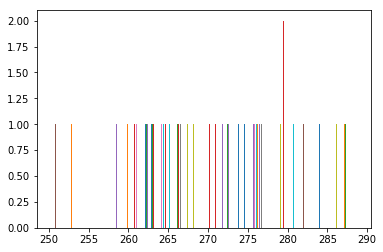

In [0]:
plt.hist(mydata)
plt.show()

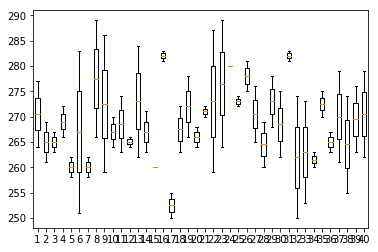

In [0]:
plt.boxplot(mydata)
plt.show()

In [0]:
# calculare tstatistic and p value for current and new values ( direct method)

In [0]:
mydata2=np.array([
[264,277],
[261,269],
[267,263],
[272,266],
[258,262],
[283,251],
[258,262],
[266,289],
[259,286],
[270,264],
[263,274],
[264,266],
[284,262],
[263,271],
[260,260],
[283,281],
[255,250],
[272,263],
[266,278],
[268,264],
[270,272],
[287,259],
[289,264],
[280,280],
[272,274],
[275,281],
[265,276],
[260,269],
[278,268],
[275,262],
[281,283],
[274,250],
[273,253],
[263,260],
[275,270],
[267,263],
[279,261],
[274,255],
[276,263],
[262,279]]
)

In [0]:
pre=mydata2[:,0]
post=mydata2[:,1]

In [0]:
# PERFORM SHAPIRO AND LEVENE TEST

In [0]:
tstatistic,p_value=ttest_1samp(post-pre,0)
print(tstatistic,p_value)

-1.2769699827911767 0.20916361823147053


In [0]:
z_statistic,p_value=wilcoxon(post-pre)

In [0]:
print(z_statistic,p_value)

291.5 0.2516033447950283


In [0]:
levene(pre,post)

LeveneResult(statistic=0.2553238291765741, pvalue=0.6147759523331309)

In [0]:
# perform Shapiro test
shapiro(post)

(0.9678263664245605, 0.3064655363559723)

In [0]:
#CALCULATE POOLED STANDARD DEVIATION
(np.mean(pre)-np.mean(post)) / np.sqrt(((41-1)*np.var(pre)+ (41-1)*np.var(post))/41+41-2)

0.19379163991320236

In [0]:
print(ttest_power(0.79,nobs=41,alpha=0.05,alternative="two-sided"))

0.9985295943051721


In [0]:
xbar=mydata2.mean()

In [0]:
mu=144

In [0]:
s=mydata1.std()

In [0]:
n=41

In [0]:
tstat=(xbar-mu)/(s/np.sqrt(n))

In [0]:
tstat

81.82937131305316

In [0]:
from scipy import stats
p=stats.t.cdf(1.224674,df=29)

In [0]:
(1-p)*2

0.2305534044836084

In [0]:
#calculate SAMPLE POWER
mydata

,Current,New
0,264,277
1,261,269
2,267,263
3,272,266
4,258,262
5,283,251
6,258,262
7,266,289
8,259,286
9,270,264


group1=mydata('Current')
group2=mydata('New')

In [0]:
tstatistic,p_value=ttest_ind(group1,group2)

In [0]:
print(tstatistic,p_value)


1.3283615935245678 0.18793228491854663


In [0]:
cont=pd.crosstab(mydata['Current'],mydata['New'])

In [0]:
cont

New,250,251,253,255,259,260,261,262,263,264,...,274,276,277,278,279,280,281,283,286,289
Current,,,,,,,,,,,,,,,,,,,,,
255,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
258,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
259,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
260,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
261,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
262,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
263,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
264,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
265,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [0]:
chi2_contingency(cont)

(690.0,
 0.036163809160820556,
 625,
 array([[0.05 , 0.025, 0.025, 0.025, 0.025, 0.05 , 0.025, 0.1  , 0.1  ,
         0.075, 0.05 , 0.025, 0.05 , 0.025, 0.025, 0.025, 0.05 , 0.025,
         0.025, 0.025, 0.025, 0.025, 0.05 , 0.025, 0.025, 0.025],
        [0.1  , 0.05 , 0.05 , 0.05 , 0.05 , 0.1  , 0.05 , 0.2  , 0.2  ,
         0.15 , 0.1  , 0.05 , 0.1  , 0.05 , 0.05 , 0.05 , 0.1  , 0.05 ,
         0.05 , 0.05 , 0.05 , 0.05 , 0.1  , 0.05 , 0.05 , 0.05 ],
        [0.05 , 0.025, 0.025, 0.025, 0.025, 0.05 , 0.025, 0.1  , 0.1  ,
         0.075, 0.05 , 0.025, 0.05 , 0.025, 0.025, 0.025, 0.05 , 0.025,
         0.025, 0.025, 0.025, 0.025, 0.05 , 0.025, 0.025, 0.025],
        [0.1  , 0.05 , 0.05 , 0.05 , 0.05 , 0.1  , 0.05 , 0.2  , 0.2  ,
         0.15 , 0.1  , 0.05 , 0.1  , 0.05 , 0.05 , 0.05 , 0.1  , 0.05 ,
         0.05 , 0.05 , 0.05 , 0.05 , 0.1  , 0.05 , 0.05 , 0.05 ],
        [0.05 , 0.025, 0.025, 0.025, 0.025, 0.05 , 0.025, 0.1  , 0.1  ,
         0.075, 0.05 , 0.025, 0.05 , 0.025, 0.025, 

In [0]:
# sample power
chisquare(mydata['New'].value_counts())

Power_divergenceResult(statistic=13.3, pvalue=0.9726081407825755)